# Importando as Biliotecas

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o Dataset Fashion_mnist

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

# Análise das Dimensões dos DataFrames

In [0]:
print(len(imagens_treino))
print(imagens_treino.shape)
print(imagens_teste.shape)
print(len(identificacoes_teste))
print(identificacoes_teste.min())
print(identificacoes_teste.max())

60000
(60000, 28, 28)
(10000, 28, 28)
10000
0
9


## Visualizando a primeira imagem

Text(0.5, 1.0, '9')

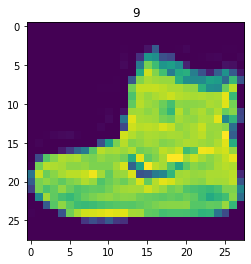

In [0]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

## Imprimindo as 10 primeiras imagens

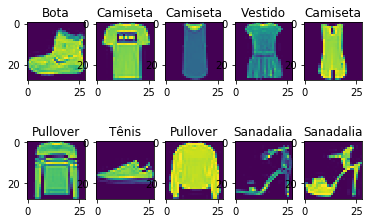

In [0]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sanadalia', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

#Keras

##Normalizando as Imagens

In [0]:
#Normalização
imagens_treino = imagens_treino/float(255)

##Criando, Compilando, Treinando e Normalizando o Modelo

In [0]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),       
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) ])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])



historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 149us/sample - loss: 0.5265 - acc: 0.8140 - val_loss: 0.4249 - val_acc: 0.8485
Epoch 2/5
48000/48000 [==============================] - 7s 136us/sample - loss: 0.3967 - acc: 0.8555 - val_loss: 0.3663 - val_acc: 0.8669
Epoch 3/5
48000/48000 [==============================] - 7s 142us/sample - loss: 0.3612 - acc: 0.8683 - val_loss: 0.3557 - val_acc: 0.8726
Epoch 4/5
48000/48000 [==============================] - 6s 133us/sample - loss: 0.3410 - acc: 0.8741 - val_loss: 0.3429 - val_acc: 0.8784
Epoch 5/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.3226 - acc: 0.8804 - val_loss: 0.3440 - val_acc: 0.8755


##Salvando e Carregando o Modelo Treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('/content/modelo.h5')

##Visualizando as Acurácias de Treino e Validação Por Época

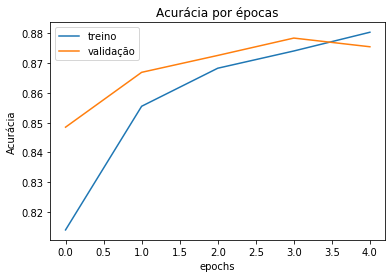

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('epochs')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

##Visualizando as perdas de treino e validação por Época

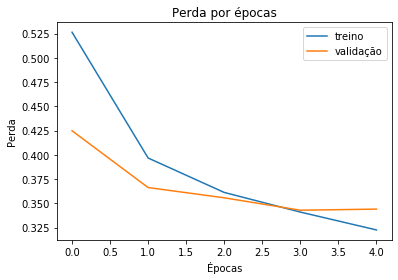

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])

##Testando o Modelo e o Modelo Salvo

In [0]:
testes = modelo.predict(imagens_teste)
print('Resultado teste ', np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

Resultado teste  2
Número da imagem de teste:  2
Resultado teste do modelo salvo:  2
Número da imagem de teste:  2


##Avaliando o Modelo

In [0]:
perdada_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do Teste ', perdada_teste)
print('Acuracia teste ', acuracia_teste)

10000/10000 [==============================] - 0s 47us/sample - loss: 66.2823 - acc: 0.8516
Perda do Teste  66.28228497238159
Acuracia teste  0.8516
